# **Линейная регрессия. Практика**

В этот раз мы коснёмся мира медицинского страхования. Нашей целью будет предсказать индивидуальные медицинские расходы граждан США, оплачиваемые медицинской страховкой.


In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #разделение выборки

In [3]:
# Прочитаем данные:
data = pd.read_csv('data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Итак, набор данных содержит следующие столбцы:

* **age** — возраст основного бенефициара;
* **sex** — пол страхового подрядчика;
* **bmi** — индекс массы тела (кгм), в идеале — от 18.5 до 24.9;
* **children** — количество детей, охваченных медицинской страховкой;
* **smoker** — является ли человек курящим;
* **region** — жилой район США (северо-восток, юго-восток, северо-запад, юго-запад);
* **charges** (целевой признак) — индивидуальные медицинские расходы, оплачиваемые медицинской страховкой.

In [4]:
# Размер таблицы:
print(data.shape)

(1338, 7)


In [5]:
# Выведем информацию о пропусках, так как наличие пропусков не позволит нам построить модель линейной регрессии:
display(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Посмотрим на типы данных:
display(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Мы знаем, что модель линейной регрессии не умеет работать с категориальными признаками, поэтому категории необходимо перекодировать.

Кодировку будем совершать по следующему принципу:

* smoker — переведём в бинарные значения (0 — некурящий, 1 — курящий);
* sex — аналогично (0 — female, 1 — male);
* region — используем OneHot-кодирование (воспользуемся функцией get_dummies).

In [7]:
# кодируем бинарные категориальные признаки
data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1)
# оставшиеся категориальные признаки кодируем с помощью OneHot
data = pd.get_dummies(data)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [8]:
features = data.drop('charges', axis=1).columns
X, y = data[features], data['charges']

In [12]:
# Разделите набор данных на тренировочную и тестовую выборки в соотношении 80/20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Выводим результирующие размеры таблиц
print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (1070, 9) (1070,)
Test: (268, 9) (268,)


In [15]:
# Обучите модель линейной регрессии аналитическим методом (LinearRegression)
# на тренировочном наборе данных. Все параметры оставьте по умолчанию.
# Чему равен свободный член (intercept) обученной модели? Ответ округлите до сотых.

#Создаём объект класса LinearRegression
lr_lstat = linear_model.LinearRegression()
#Обучаем модель — ищем параметры по МНК
lr_lstat.fit(X_train, y_train)
 
print('w0: {}'.format(lr_lstat.intercept_.round(2))) #свободный член w0
print('w1: {}'.format(lr_lstat.coef_)) #остальные параметры модели w1, w2, ..., wm

w0: -12390.8
w1: [ 2.56975706e+02 -1.85916916e+01  3.37092552e+02  4.25278784e+02
  2.36511289e+04  4.59585244e+02  8.89079180e+01 -1.98279052e+02
 -3.50214110e+02]


In [18]:
# С помощью модели, полученной в предыдущем задании, сделайте предсказание на тренировочной и тестовой выборке. Рассчитайте следующие три метрики: R^2, MAE, MAPE. Не забудьте привести значение  к процентам.
# Значение R^2 округлите до трёх знаков после точки-разделителя, а значения MAE и MAPE — до целого числа.

#Делаем предсказание по признаку LSTAT
y_predict_lstat = lr_lstat.predict(X_train)
#Рассчитываем MAE
print('MAE score: {:.0f} thou. $'.format(metrics.mean_absolute_error(y_train, y_predict_lstat)))
#Рассчитываем RMSE
print('RMSE score: {:.0f} thou. $'.format(np.sqrt(metrics.mean_squared_error(y_train, y_predict_lstat))))
#Рассчитываем MAPE
print('MAPE score: {:.0f} %'.format(metrics.mean_absolute_percentage_error(y_train, y_predict_lstat) * 100))
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y_train, y_predict_lstat)))

#Делаем предсказание по признаку LSTAT
y_predict_lstat = lr_lstat.predict(X_test)
#Рассчитываем MAE
print('MAE score: {:.0f} thou. $'.format(metrics.mean_absolute_error(y_test, y_predict_lstat)))
#Рассчитываем RMSE
print('RMSE score: {:.0f} thou. $'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predict_lstat))))
#Рассчитываем MAPE
print('MAPE score: {:.0f} %'.format(metrics.mean_absolute_percentage_error(y_test, y_predict_lstat) * 100))
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y_test, y_predict_lstat)))

MAE score: 4208 thou. $
RMSE score: 6106 thou. $
MAPE score: 42 %
R2 score: 0.742
MAE score: 4181 thou. $
RMSE score: 5796 thou. $
MAPE score: 47 %
R2 score: 0.784


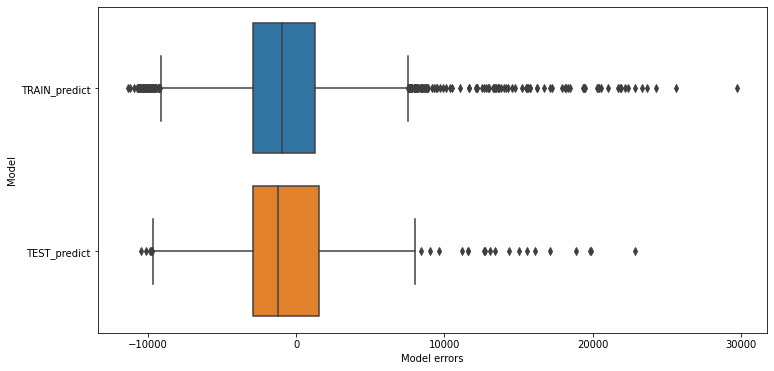

In [20]:
# Постройте диаграмму boxplot для визуализации ошибок модели линейной регрессии на тренировочной и тестовой выборках.

#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(12, 6)) #фигура + координатная плоскость
#Ошибки модели на одном факторе LSTAT
y_errors_train = y_train - lr_lstat.predict(X_train)
#Ошибки модели на всех факторах
y_errors_test = y_test - lr_lstat.predict(X_test)
#Для удобства визуализации составим DataFrame из ошибок
errors_df = pd.DataFrame(
    {'TRAIN_predict': y_errors_train, 
     'TEST_predict': y_errors_test
    }
)
#Строим boxplot для ошибок
sns.boxplot(data=errors_df, orient='h', ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

In [21]:
# Нормализуйте тренировочную и тестовую выборки с помощью min-max-нормализации
# (MinMaxScaler). Расчёт параметров нормализации (fit) произведите на тренировочной выборке.
# На нормализованных данных сгенерируйте полиномиальные признаки степени 2.
# Воспользуйтесь классом PolynomialFeatures из библиотеки sklearn. Значение параметра include_bias выставите на False.

#Создаем объект для min-max нормализации
scaler = preprocessing.MinMaxScaler()
#Вычисляем параметры для нормализации - min и max для каждого столбца
scaler.fit(X_train)
#Производим преобразование для каждой из выборок
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Создаем объект для генерации полиномиальных признаков степени 2
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
#Вычисляем параметры генерации - результирующее количество признаков
poly.fit(X_train_scaled)
#Производим преобразование для каждой из выборок
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

print('Train shape: {}'.format(X_train_scaled_poly.shape))
print('Test shape: {}'.format(X_test_scaled_poly.shape))

Train shape: (1070, 54)
Test shape: (268, 54)


In [33]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.0f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.0f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Train MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

In [30]:
# Обучите модель линейной регрессии на полиномиальных признаках.
# Чему равно значение метрики  на тестовой выборке?
# Значение  округлите до трёх знаков после запятой.

lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train_scaled_poly, y_train)
y_train_pred = lr_poly.predict(X_train_scaled_poly)
y_test_pred = lr_poly.predict(X_test_scaled_poly)
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.842
Train MAE: 2872.943
Train MAPE: 29.241


Test R^2: 0.866
Test MAE: 2716.693
Train MAPE: 30.011


In [31]:
# Выведите значения коэффициентов полученной модели.
print('w0: {}'.format(lr_poly.intercept_.round(2))) #свободный член w0
print('w1: {}'.format(lr_poly.coef_)) #остальные параметры модели w1, w2, ..., wm

w0: 2.2580683546183828e+16
w1: [ 3.28425930e+16  5.24092415e+15 -3.54274027e+15  5.56107133e+15
 -4.36104954e+15 -4.32544728e+15 -1.27568697e+17 -1.54961145e+16
 -5.06580635e+16  8.44000000e+03  8.78000000e+02  8.20000000e+02
 -1.73200000e+03  1.84000000e+02 -3.28425930e+16 -3.28425930e+16
 -3.28425930e+16 -3.28425930e+16 -5.62830332e+16  7.20250000e+02
 -1.29050000e+03  2.70000000e+02  5.10421091e+16  5.10421091e+16
  5.10421091e+16  5.10421091e+16 -9.74062500e+03  1.60400000e+03
  5.48413125e+04  3.54274027e+15  3.54274027e+15  3.54274027e+15
  3.54274027e+15 -2.08000000e+03 -2.18400000e+03 -5.56107133e+15
 -5.56107133e+15 -5.56107133e+15 -5.56107133e+15 -2.08317967e+15
  6.44422921e+15  6.44422921e+15  6.44422921e+15  6.44422921e+15
 -1.82552363e+16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.04988013e+17  0.00000000e+00  0.00000000e+00 -7.08456908e+15
  0.00000000e+00  2.80773799e+16]


In [34]:
# Постройте линейную регрессию с L1-регуляризацией (Lasso) на полиномиальных признаках.
# В качестве параметра alpha используйте значение по умолчанию, параметр max_iter установите в значение 2000.
# Значение R^2 округлите до трёх знаков после запятой, а значения MAE и MAPE до целого числа.

#Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso(max_iter=2000)
#Обучаем модель
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)
#Рассчитываем коэффициенты для двух выборок
print_metrics(y_train, y_train_predict_poly, y_test, y_test_predict_poly)

Train R^2: 0.842
Train MAE: 2890
Train MAPE: 29


Test R^2: 0.867
Test MAE: 2719
Train MAPE: 30


In [35]:
# Выведите значения коэффициентов полученной модели.
print('w0: {}'.format(lasso_lr_poly.intercept_.round(2))) #свободный член w0
print('w1: {}'.format(lasso_lr_poly.coef_)) #остальные параметры модели w1, w2, ..., wm

w0: 2249.71
w1: [ 3.24221653e+03 -4.92313816e+02  5.07612317e+03  4.58362056e+03
  1.97928569e+03  1.88025707e+02 -4.70775218e+02  5.83657101e+02
 -2.43543456e+02  8.29826751e+03  7.74581954e+02  8.44448593e+02
 -1.20775688e+03  1.34809915e+02 -1.04309726e+03 -0.00000000e+00
  1.16964229e+03  1.61765564e+03 -0.00000000e+00  5.05847740e+02
 -1.13425152e+03  2.65796922e+02 -1.22240479e+03  0.00000000e+00
  2.36213242e+02 -5.80031340e+02 -8.17963257e+03  1.29487768e+03
  5.47148553e+04  3.58531873e+03  2.40690210e+03 -9.63549427e+02
  0.00000000e+00 -1.67464337e+03 -2.05436459e+03  1.94204864e+03
  1.95394442e+03 -0.00000000e+00 -1.06364416e+03  8.00606774e+00
  5.93688978e+02 -0.00000000e+00 -2.30643423e+02  1.97933477e+03
  6.31615519e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -6.05849873e-01]


In [36]:
# Постройте линейную регрессию с L2-регуляризацией на полиномиальных признаках.
# В качестве параметра alpha используйте значение по умолчанию.
# Значение R^2 округлите до трёх знаков после запятой, а значения MAE и MAPE до целого числа.

#Создаём объект класса линейной регрессии с L2-регуляризацией
ridge_lr_poly = linear_model.Ridge()
#Обучаем модель
ridge_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = ridge_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = ridge_lr_poly.predict(X_test_scaled_poly)
#Рассчитываем коэффициенты для двух выборок
print_metrics(y_train, y_train_predict_poly, y_test, y_test_predict_poly)

Train R^2: 0.839
Train MAE: 2949
Train MAPE: 30


Test R^2: 0.863
Test MAE: 2861
Train MAPE: 31
